Installing Packages

In [ ]:
pip install ucimlrepo

In [118]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [60]:
!pip install miceforest --no-cache-dir


In [ ]:
pip install torch

In [ ]:
pip install ltcn

Importing usefull libraries

In [315]:
import seaborn as sns
import miceforest as mf
import numpy as np
import keras
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline as imbpipeline



Loading the data

In [721]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 
  
# metadata 
print(myocardial_infarction_complications.metadata) 
  
# variable information 
print(myocardial_infarction_complications.variables)

{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'tit

Some initial Exploratory Data Analysis

In [722]:
X.info(10)
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 111 columns):
 #    Column         Dtype  
---   ------         -----  
 0    AGE            float64
 1    SEX            int64  
 2    INF_ANAM       float64
 3    STENOK_AN      float64
 4    FK_STENOK      float64
 5    IBS_POST       float64
 6    IBS_NASL       float64
 7    GB             float64
 8    SIM_GIPERT     float64
 9    DLIT_AG        float64
 10   ZSN_A          float64
 11   nr_11          float64
 12   nr_01          float64
 13   nr_02          float64
 14   nr_03          float64
 15   nr_04          float64
 16   nr_07          float64
 17   nr_08          float64
 18   np_01          float64
 19   np_04          float64
 20   np_05          float64
 21   np_07          float64
 22   np_08          float64
 23   np_09          float64
 24   np_10          float64
 25   endocr_01      float64
 26   endocr_02      float64
 27   endocr_03      float64
 28   zab_leg_01     f

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1690.000000,1590.000000,1569.000000,1690.000000,1689.000000,1687.000000,1683.000000,1683.000000,1684.000000,1684.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.331953,0.113208,0.084767,0.283432,0.127294,0.666864,0.714795,0.743910,0.017815,0.202494
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.628311,0.399514,0.355107,0.450798,0.333401,0.471474,0.451646,0.436602,0.132317,0.401978
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Outlier Analysis

In [723]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def outlier_plot(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

#https://www.kaggle.com/code/corazon17/mhr-analysis-and-classification-90-15-accuracy 
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

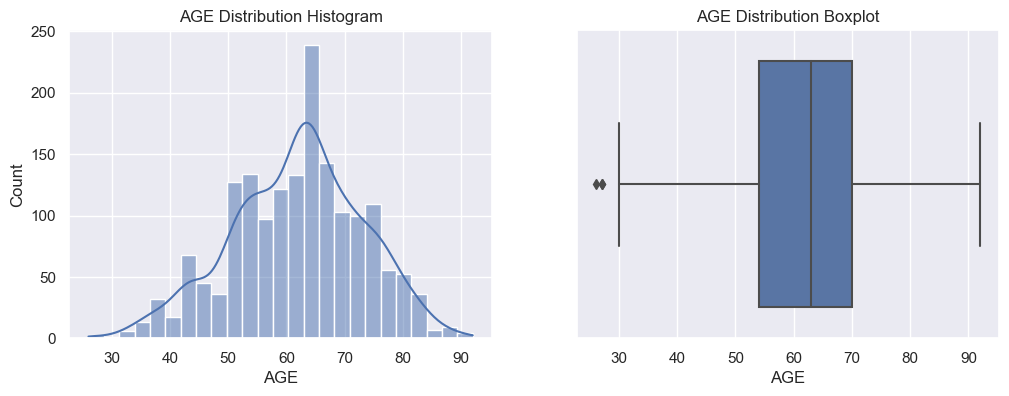

In [320]:
outlier_plot(X, "AGE")

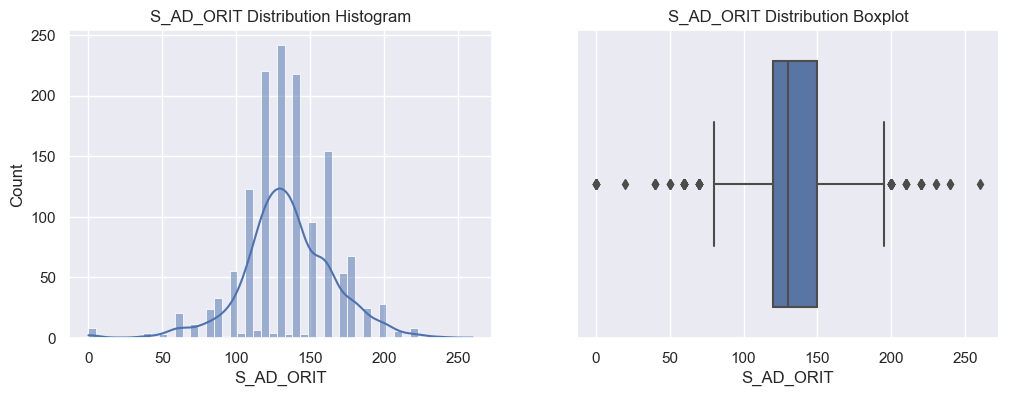

In [321]:
outlier_plot(X, "S_AD_ORIT")

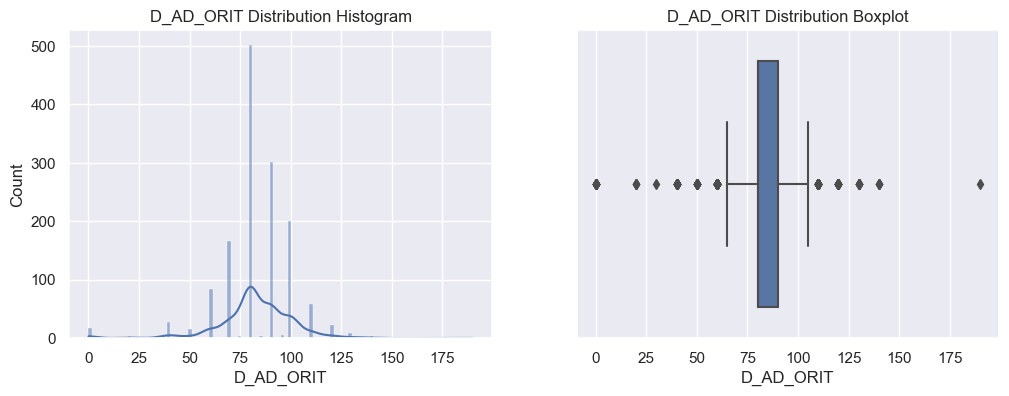

In [322]:
outlier_plot(X, "D_AD_ORIT")

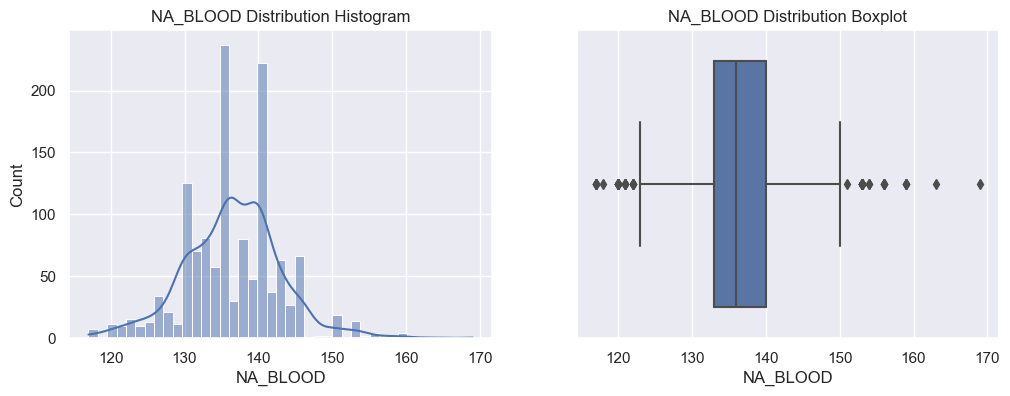

In [323]:
outlier_plot(X, "NA_BLOOD")

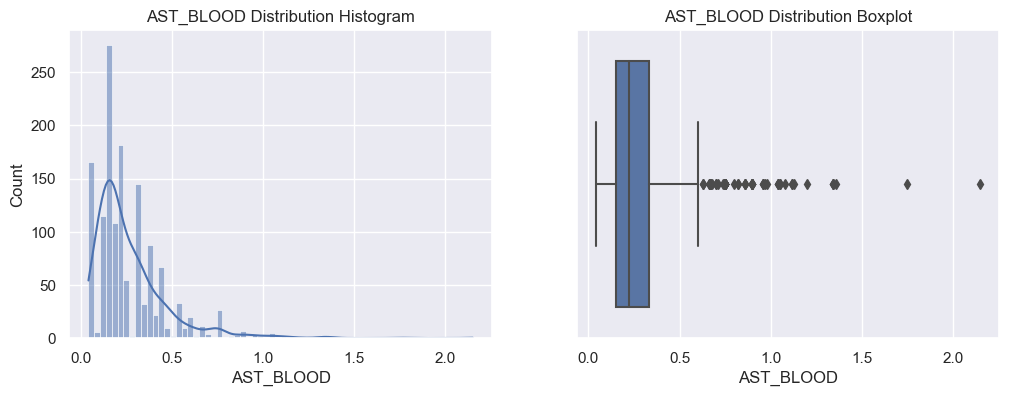

In [324]:
outlier_plot(X, "AST_BLOOD")

In [ ]:
#There don't seem to be any extreme outliers. Most features are categorical. The outlier analysis was done on the numerical features. 
#the categorical features could be seen by the min - max value after calling .describe function

In [724]:
# Get the column indices of all features
for idx, col in enumerate(X.columns):
    print(f"Column Name: {col}, Column Index: {idx}")

Column Name: AGE, Column Index: 0
Column Name: SEX, Column Index: 1
Column Name: INF_ANAM, Column Index: 2
Column Name: STENOK_AN, Column Index: 3
Column Name: FK_STENOK, Column Index: 4
Column Name: IBS_POST, Column Index: 5
Column Name: IBS_NASL, Column Index: 6
Column Name: GB, Column Index: 7
Column Name: SIM_GIPERT, Column Index: 8
Column Name: DLIT_AG, Column Index: 9
Column Name: ZSN_A, Column Index: 10
Column Name: nr_11, Column Index: 11
Column Name: nr_01, Column Index: 12
Column Name: nr_02, Column Index: 13
Column Name: nr_03, Column Index: 14
Column Name: nr_04, Column Index: 15
Column Name: nr_07, Column Index: 16
Column Name: nr_08, Column Index: 17
Column Name: np_01, Column Index: 18
Column Name: np_04, Column Index: 19
Column Name: np_05, Column Index: 20
Column Name: np_07, Column Index: 21
Column Name: np_08, Column Index: 22
Column Name: np_09, Column Index: 23
Column Name: np_10, Column Index: 24
Column Name: endocr_01, Column Index: 25
Column Name: endocr_02, Col

Dropping irrelevant features

In [725]:
#run this to test if correct
#features containing data that was collected after admission to the hospital
data_dropped = X.drop(X.columns[[91, 92, 93, 98, 99, 100, 101, 102, 103]], axis=1)

In [591]:
#data_dropped = X.drop(X.columns[[92, 93, 99, 100, 102, 103]], axis=1)

In [726]:
#percentage of missing data per column
percent_missing = data_dropped.isnull().sum() * 100 / len(data_dropped)
print(percent_missing.sort_values(ascending=False))

KFK_BLOOD     99.764706
IBS_NASL      95.764706
S_AD_KBRIG    63.294118
D_AD_KBRIG    63.294118
NOT_NA_KB     40.352941
                ...    
zab_leg_03     0.411765
zab_leg_04     0.411765
INF_ANAM       0.235294
IM_PG_P        0.058824
SEX            0.000000
Length: 102, dtype: float64


In [727]:
#Dropping features containing more than "X amount" of missing values.
data_dropped.drop(["KFK_BLOOD", "IBS_NASL", "D_AD_KBRIG", "S_AD_KBRIG"], axis=1, inplace=True) #drop Not_NA_KB as well? and next two?

In [728]:
#percentage of missing data per column
percent_missing = data_dropped.isnull().sum() * 100 / len(data_dropped)
print(percent_missing.sort_values(ascending=False))

NOT_NA_KB     40.352941
LID_KB        39.823529
NA_KB         38.647059
NA_BLOOD      22.058824
GIPER_NA      22.058824
                ...    
zab_leg_03     0.411765
zab_leg_04     0.411765
INF_ANAM       0.235294
IM_PG_P        0.058824
SEX            0.000000
Length: 98, dtype: float64


Labeling the target labels for the classification task

In [729]:
y.loc[y.LET_IS == 0, "Lethal_outcome"] = 0 #"Alive"
y.loc[y.LET_IS != 0, "Lethal_outcome"] = 1 #"Complication leading to death"


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [730]:
y = y["Lethal_outcome"]


Visualizing the class imbalance present in the dataset

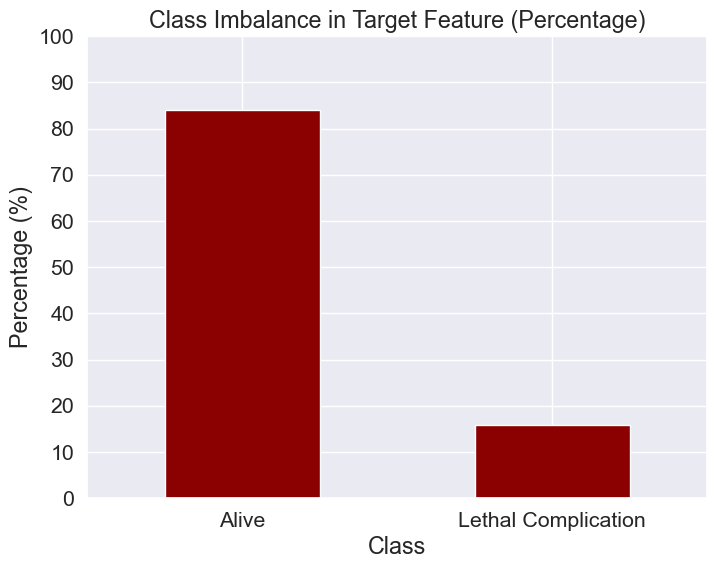

In [731]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'y' is your target feature (class labels)
# Create a Pandas DataFrame to analyze the class distribution
class_distribution = pd.Series(y).value_counts(normalize=True) * 100  # Calculate percentages 

# Create a list of custom class labels
custom_labels = ["Alive", "Lethal Complication"]  # Replace with your own labels

# Create a bar plot for class imbalance
plt.figure(figsize=(8, 6))
ax = class_distribution.plot(kind='bar', color='darkred')
plt.title('Class Imbalance in Target Feature (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')

# Set the y-axis limits to 0-100
plt.ylim(0, 100)

# Add y-axis ticks in increments of 10 if needed
plt.yticks(range(0, 110, 10))

# Manually rename x-axis tick labels
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels, rotation=0)

plt.show()

#This Bar plot shows the class imbalance present in the dataset. This is the reason SMOTE (Maybe other additional steps?) will be applied to treat the class imbalance. 

Train / Test split. 80/20

In [732]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_dropped, y, test_size = 0.2, stratify=y, random_state = 42)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(1360, 98) (340, 98)
(1360,) (340,)


Imputing the missing values using the MiceForrest library

In [733]:
#MICE missing data imputation

import miceforest as mf
# Create kernel. 
kds_train = mf.ImputationKernel(
  X_train,
  random_state=42
)

kds_test = mf.ImputationKernel( 
  X_test,
  random_state=42
)

#Check for imputed value performance!!
kds_train.mice(iterations=5, n_estimators=50)
kds_test.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
X_train = kds_train.complete_data()
X_test = kds_test.complete_data()

# Check if this is the correct way to do it??!!

Logistic Regression Model (Baseline) With SMOTE

In [886]:
## SMOTE + Logistic Regression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

pipeline = imbpipeline(steps = [["smote", SMOTE(random_state=42)],
                                ["scaler", MinMaxScaler()],
                                ["classifier", LogisticRegression(random_state=42,
                                                                 max_iter=100)]])


stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=42)


param_grid = {"classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "classifier__solver": ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
              } 
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring="f1",
                           cv=stratified_kfold,
                           n_jobs=-1)

history = grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
y_pred_lr1 = grid_search.predict(X_test)
print(f"Cross-validation score: {cv_score}\nTest score: {test_score}")

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


## Code retrieved from: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
#https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7 


Cross-validation score: 0.5449765114418846
Test score: 0.5165562913907286
Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}


In [887]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr1, digits=3, zero_division=1))

              precision    recall  f1-score   support

         0.0      0.938     0.797     0.862       286
         1.0      0.402     0.722     0.517        54

    accuracy                          0.785       340
   macro avg      0.670     0.760     0.689       340
weighted avg      0.853     0.785     0.807       340



In [890]:
accuracy_score(y_test, y_pred_lr1)

0.7852941176470588

In [888]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred_lr1)

0.3926194205168363

In [892]:
roc_auc_score(y_test, y_pred_lr1)

0.7597125097125097

In [897]:
specificity_score(y_test, y_pred_lr1)

0.7972027972027972

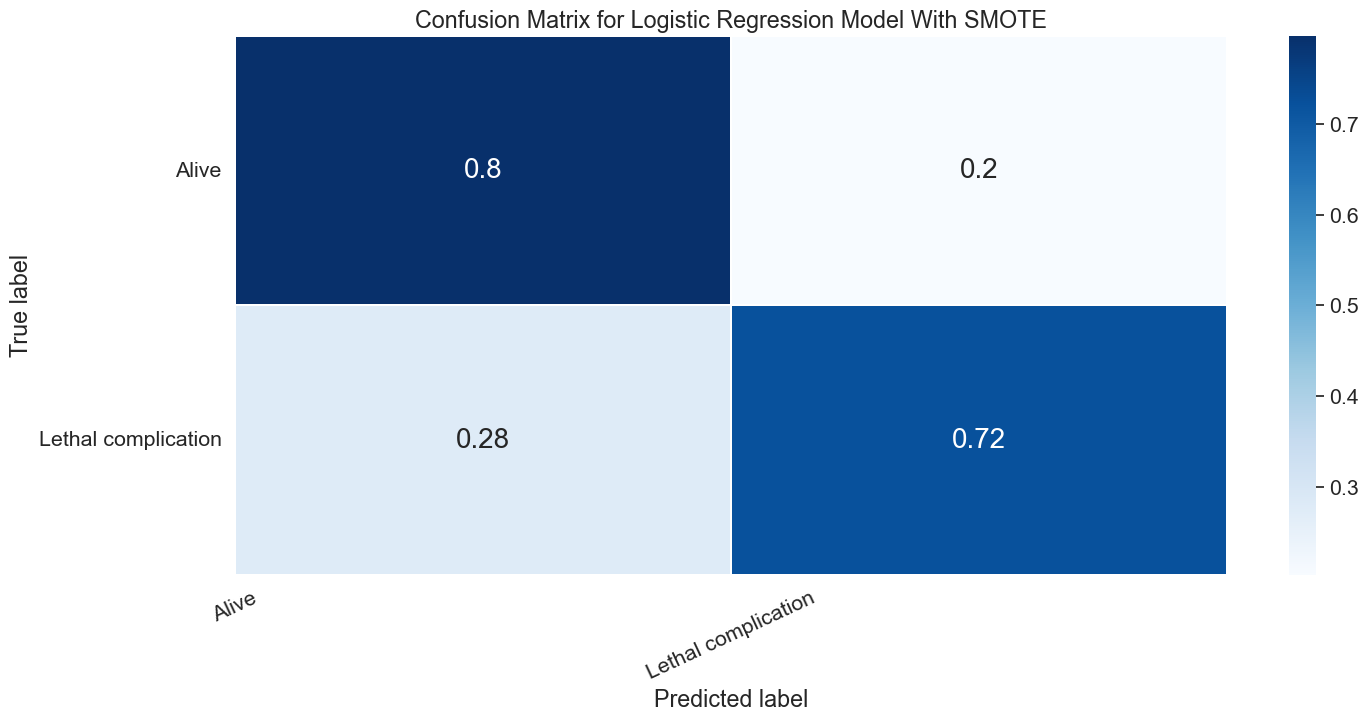

In [907]:
#Update for the logistic regression model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_lr1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ["Alive", "Lethal complication"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model With SMOTE')
plt.show()

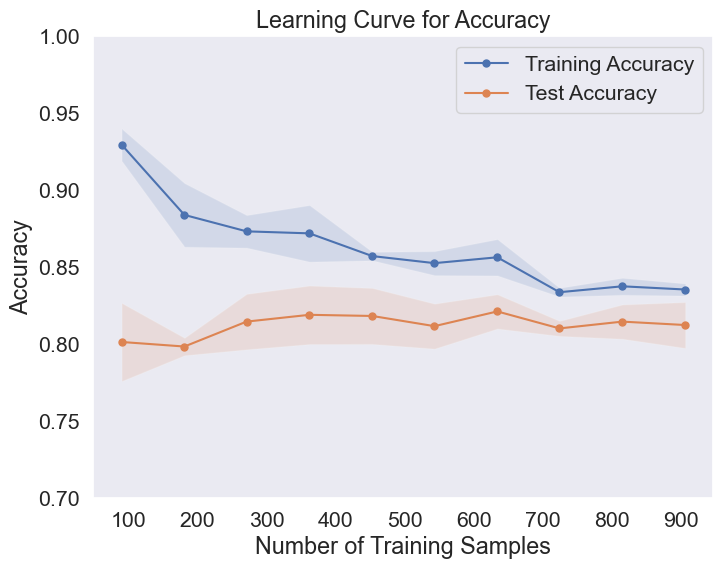

In [739]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have your best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Create a learning curve for accuracy
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold)

# Calculate mean and standard deviation of accuracy for training and test sets
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a plot of the learning curve for accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, marker='o', markersize=5, label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15)
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve for Accuracy')

# Adjust the limits of the y-axis to increase the range
plt.ylim(0.7, 1.0)  # You can adjust the range (0.7 to 1.0 in this example)
plt.grid()
plt.show()


#Help from Chatgpt

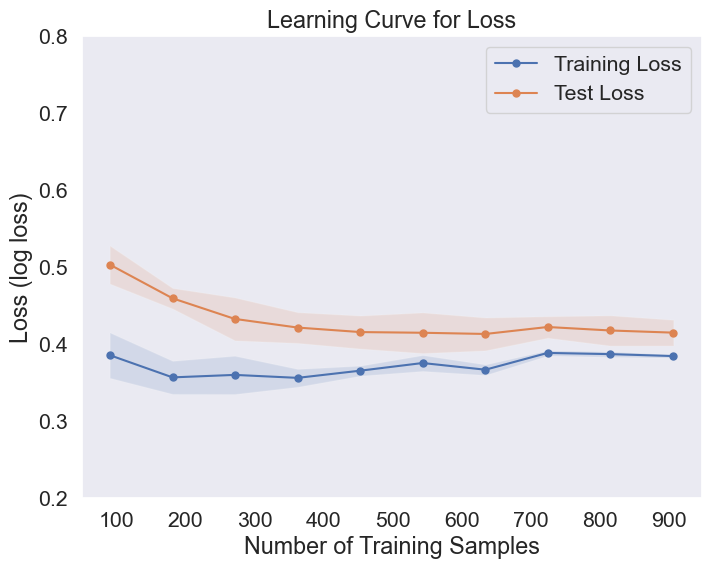

In [740]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss

# Assuming you have your best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Create a custom scoring function for log loss
def custom_scoring(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return -log_loss(y, y_pred)

# Create a learning curve for log loss
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold, scoring=custom_scoring)

# Calculate mean and standard deviation of log loss for training and test sets
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a plot of the learning curve for loss
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', markersize=5, label='Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, marker='o', markersize=5, label='Test Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15)
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss (log loss)')
plt.legend()
plt.title('Learning Curve for Loss')

# Adjust the limits of the y-axis to increase the range
plt.ylim(0.2, 0.8)  # You can adjust the range (0 to 2 in this example)
plt.grid()
plt.show()


#Help from Chatgpt

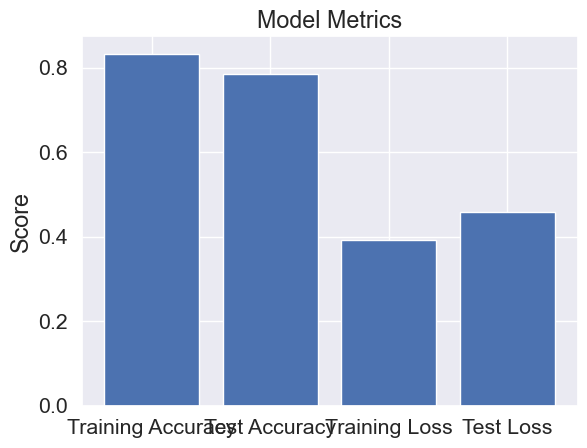

In [741]:
from sklearn.metrics import accuracy_score, log_loss

# Fit the best estimator on your training data
best_estimator.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log loss for training and test data
y_train_prob = best_estimator.predict_proba(X_train)  # Probabilities for training data
y_test_prob = best_estimator.predict_proba(X_test)    # Probabilities for test data
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)

# Create a bar plot to show accuracy and loss
import matplotlib.pyplot as plt

metrics = ['Training Accuracy', 'Test Accuracy', 'Training Loss', 'Test Loss']
values = [train_accuracy, test_accuracy, train_loss, test_loss]

plt.bar(metrics, values)
plt.ylabel('Score')
plt.title('Model Metrics')
plt.show()

Logistic Regression without SMOTE

In [742]:
#Logistic Regression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

pipeline = imbpipeline(steps = [["scaler", MinMaxScaler()],
                                ["classifier", LogisticRegression(random_state=42,
                                                                 max_iter=100)]])


stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=42)

#change the solver as well

param_grid = {"classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "classifier__solver": ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
              } #add Solver parameter to grid!!!
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring="f1",
                           cv=stratified_kfold,
                           n_jobs=-1)

history = grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
y_pred_lr = grid_search.predict(X_test)
print(f"Cross-validation score: {cv_score}\nTest score: {test_score}")

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Cross-validation score: 0.5260577804108322
Test score: 0.43750000000000006
Best Parameters: {'classifier__C': 10, 'classifier__solver': 'liblinear'}


In [893]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr, digits=3, zero_division=1))

              precision    recall  f1-score   support

         0.0      0.889     0.927     0.908       286
         1.0      0.500     0.389     0.438        54

    accuracy                          0.841       340
   macro avg      0.695     0.658     0.673       340
weighted avg      0.827     0.841     0.833       340



In [894]:
roc_auc_score(y_test, y_pred_lr)

0.6577311577311578

In [895]:
cohen_kappa_score(y_test, y_pred_lr)

0.3467122117847993

In [931]:
f1_score(y_test, y_pred_lr)

0.43750000000000006

XGBoost Model without SMOTE

In [746]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier

XGB_pipeline_basic = imbpipeline(steps = [["scaler", StandardScaler()],
                                ["xgb_classifier", XGBClassifier(random_state=42)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=42)

XGB_param_grid = {
        'xgb_classifier__min_child_weight': [0.5, 1, 5],
        'xgb_classifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgb_classifier__subsample': [0.6, 0.8, 1.0],
        'xgb_classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
        'xgb_classifier__max_depth': [2, 4, 6],
        'xgb_classifier__n_estimators': [100, 200, 400],
        'xgb_classifier__learning_rate': [0.01, 0.1, 0.2]}

xgb_grid_search_basic = GridSearchCV(estimator=XGB_pipeline_basic,
                           param_grid=XGB_param_grid,
                           scoring="roc_auc",
                           cv=stratified_kfold,
                           n_jobs=-1)

xgb_grid_search_basic.fit(X_train, y_train)
y_pred_xgb_basic = xgb_grid_search_basic.predict(X_test)
cv_score_xgb_basic = xgb_grid_search_basic.best_score_
test_score_xgb_basic = xgb_grid_search_basic.score(X_test, y_test)
print(f"Cross-validation score: {cv_score_xgb_basic}\nTest score: {test_score_xgb_basic}")

best_params_xgb_basic = xgb_grid_search_basic.best_params_
print("Best Parameters:", best_params_xgb_basic)

#runs for 45 mins

Cross-validation score: 0.8766365914686843
Test score: 0.8621471121471121
Best Parameters: {'xgb_classifier__colsample_bytree': 0.6, 'xgb_classifier__gamma': 0.5, 'xgb_classifier__learning_rate': 0.1, 'xgb_classifier__max_depth': 6, 'xgb_classifier__min_child_weight': 1, 'xgb_classifier__n_estimators': 100, 'xgb_classifier__subsample': 0.8}


In [909]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_basic, digits=3, zero_division=1))

              precision    recall  f1-score   support

         0.0      0.901     0.958     0.929       286
         1.0      0.667     0.444     0.533        54

    accuracy                          0.876       340
   macro avg      0.784     0.701     0.731       340
weighted avg      0.864     0.876     0.866       340



In [908]:
print(roc_auc_score(y_test, y_pred_xgb_basic))
print(cohen_kappa_score(y_test, y_pred_xgb_basic))

0.7012432012432013
0.46540880503144655


In [932]:
f1_score(y_test, y_pred_xgb_basic)

0.5333333333333333

XGBoost Model With SMOTE

In [749]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier

XGB_pipeline = imbpipeline(steps = [["smote", SMOTE(random_state=42)],
                                #["scaler", StandardScaler()], try without standardscalar
                                ["xgb_classifier", XGBClassifier(random_state=42)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=42)

XGB_param_grid = {
        'xgb_classifier__min_child_weight': [0.5, 1, 5], # lower value for Imbalanced datasets
        'xgb_classifier__gamma': [0.5, 1, 1.5, 2, 5], 
        'xgb_classifier__subsample': [0.6, 0.8, 1.0],
        'xgb_classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
        'xgb_classifier__max_depth': [2, 4, 6], #check this one, values with more margin 
        'xgb_classifier__n_estimators': [100, 200, 400],
        'xgb_classifier__learning_rate': [0.01, 0.1, 0.2]} #add scale_pos_Weight?

xgb_grid_search = GridSearchCV(estimator=XGB_pipeline,
                           param_grid=XGB_param_grid,
                           scoring="roc_auc", #try with f1
                           cv=stratified_kfold,
                           n_jobs=-1)

xgb_grid_search.fit(X_train, y_train)
cv_score_xgb = xgb_grid_search.best_score_
test_score_xgb = xgb_grid_search.score(X_test, y_test)
print(f"Cross-validation score: {cv_score_xgb}\nTest score: {test_score_xgb}")

best_params_xgb = xgb_grid_search.best_params_
print("Best Parameters:", best_params_xgb)

#Ran for 1.5 hours
#79 mins
#Early stopping??

Cross-validation score: 0.8756834666975607
Test score: 0.8664206164206164
Best Parameters: {'xgb_classifier__colsample_bytree': 0.9, 'xgb_classifier__gamma': 1, 'xgb_classifier__learning_rate': 0.1, 'xgb_classifier__max_depth': 6, 'xgb_classifier__min_child_weight': 0.5, 'xgb_classifier__n_estimators': 200, 'xgb_classifier__subsample': 0.8}


Cross-validation score: 0.8815721664928869
Test score: 0.84990934990935
Best Parameters: {'xgb_classifier__colsample_bytree': 0.6, 'xgb_classifier__gamma': 1, 'xgb_classifier__learning_rate': 0.1, 'xgb_classifier__max_depth': 5, 'xgb_classifier__min_child_weight': 1, 'xgb_classifier__n_estimators': 400, 'xgb_classifier__subsample': 1.0}

In [750]:
y_pred_xgb = xgb_grid_search.predict(X_test)

In [751]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb, digits=3, zero_division=1))

              precision    recall  f1-score   support

         0.0      0.905     0.962     0.932       286
         1.0      0.694     0.463     0.556        54

    accuracy                          0.882       340
   macro avg      0.800     0.712     0.744       340
weighted avg      0.871     0.882     0.872       340



In [752]:
print(roc_auc_score(y_test, y_pred_xgb))
print(cohen_kappa_score(y_test, y_pred_xgb))

0.7122507122507123
0.49086552860137767


In [753]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_tuning_results(df_val):
    # Separate data based on max_features value
    df_child_weight_1 = df_val[df_val['xgb_classifier__min_child_weight'] == 1]
    df_child_weight_5 = df_val[df_val['xgb_classifier__min_child_weight'] == 5]
    df_child_weight_10 = df_val[df_val['xgb_classifier__min_child_weight'] == 10]

    # Create pivot tables
    pivot1 = df_child_weight_1.pivot_table(index='xgb_classifier__n_estimators', columns='xgb_classifier__max_depth', values='accuracy')
    pivot2 = df_child_weight_5.pivot_table(index='xgb_classifier__n_estimators', columns='xgb_classifier__max_depth', values='accuracy')
    pivot3 = df_child_weight_10.pivot_table(index='xgb_classifier__n_estimators', columns='xgb_classifier__max_depth', values='accuracy')

    # Plotting the results
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.heatmap(pivot1, annot=True, fmt=".3f", cmap="YlGnBu", cbar=False, ax=axes[0])
    sns.heatmap(pivot2, annot=True, fmt=".3f", cmap="YlGnBu", cbar=False, ax=axes[1])
    sns.heatmap(pivot3, annot=True, fmt=".3f", cmap="YlGnBu", cbar=False, ax=axes[2])

    axes[0].set_title("min_child_weight: 1")
    axes[1].set_title("min_child_weight: 5")
    axes[2].set_title("min_child_weight: 10")
    plt.tight_layout()
    plt.show()

# Replace 'df_val' with your actual DataFrame containing the GridSearchCV results
# Ensure that 'mean_test_score' column exists in your DataFrame
# Example usage:
# plot_tuning_results(df_val)


In [910]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_tuning_results(df_val):
    # Create separate dataframes based on different hyperparameters
    df_child_weight_1 = df_val[df_val['xgb_classifier__min_child_weight'] == 1]
    df_child_weight_5 = df_val[df_val['xgb_classifier__min_child_weight'] == 5]
    df_child_weight_10 = df_val[df_val['xgb_classifier__min_child_weight'] == 10]

    # List of other hyperparameters
    other_hyperparams = [
        'xgb_classifier__gamma', 
        'xgb_classifier__subsample', 
        'xgb_classifier__colsample_bytree', 
        'xgb_classifier__max_depth', 
        'xgb_classifier__n_estimators', 
        'xgb_classifier__learning_rate'
    ]

    # Create subplots for each hyperparameter
    fig, axes = plt.subplots(len(other_hyperparams), 3, figsize=(18, 5 * len(other_hyperparams)))

    for i, hyperparam in enumerate(other_hyperparams):
        df_param_1 = df_child_weight_1.pivot_table(index='xgb_classifier__n_estimators', columns=hyperparam, values='accuracy')
        df_param_5 = df_child_weight_5.pivot_table(index='xgb_classifier__n_estimators', columns=hyperparam, values='accuracy')
        df_param_10 = df_child_weight_10.pivot_table(index='xgb_classifier__n_estimators', columns=hyperparam, values='accuracy')

        sns.heatmap(df_param_1, annot=True, fmt=".3f", cmap="YlGnBu", cbar=False, ax=axes[i, 0])
        sns.heatmap(df_param_5, annot=True, fmt=".3f", cmap="YlGnBu", cbar=False, ax=axes[i, 1])
        sns.heatmap(df_param_10, annot=True, fmt=".3f", cmap="YlGnBu", cbar=False, ax=axes[i, 2])

        axes[i, 0].set_title(f"{hyperparam}: {1}")
        axes[i, 1].set_title(f"{hyperparam}: {5}")
        axes[i, 2].set_title(f"{hyperparam}: {10}")

    plt.tight_layout()
    plt.show()

# Replace 'df_val' with your actual DataFrame containing the GridSearchCV results
# Ensure that 'mean_test_score' column exists in your DataFrame
# Example usage:
# plot_tuning_results(df_val)
#help from chatgpt


ValueError: zero-size array to reduction operation fmin which has no identity

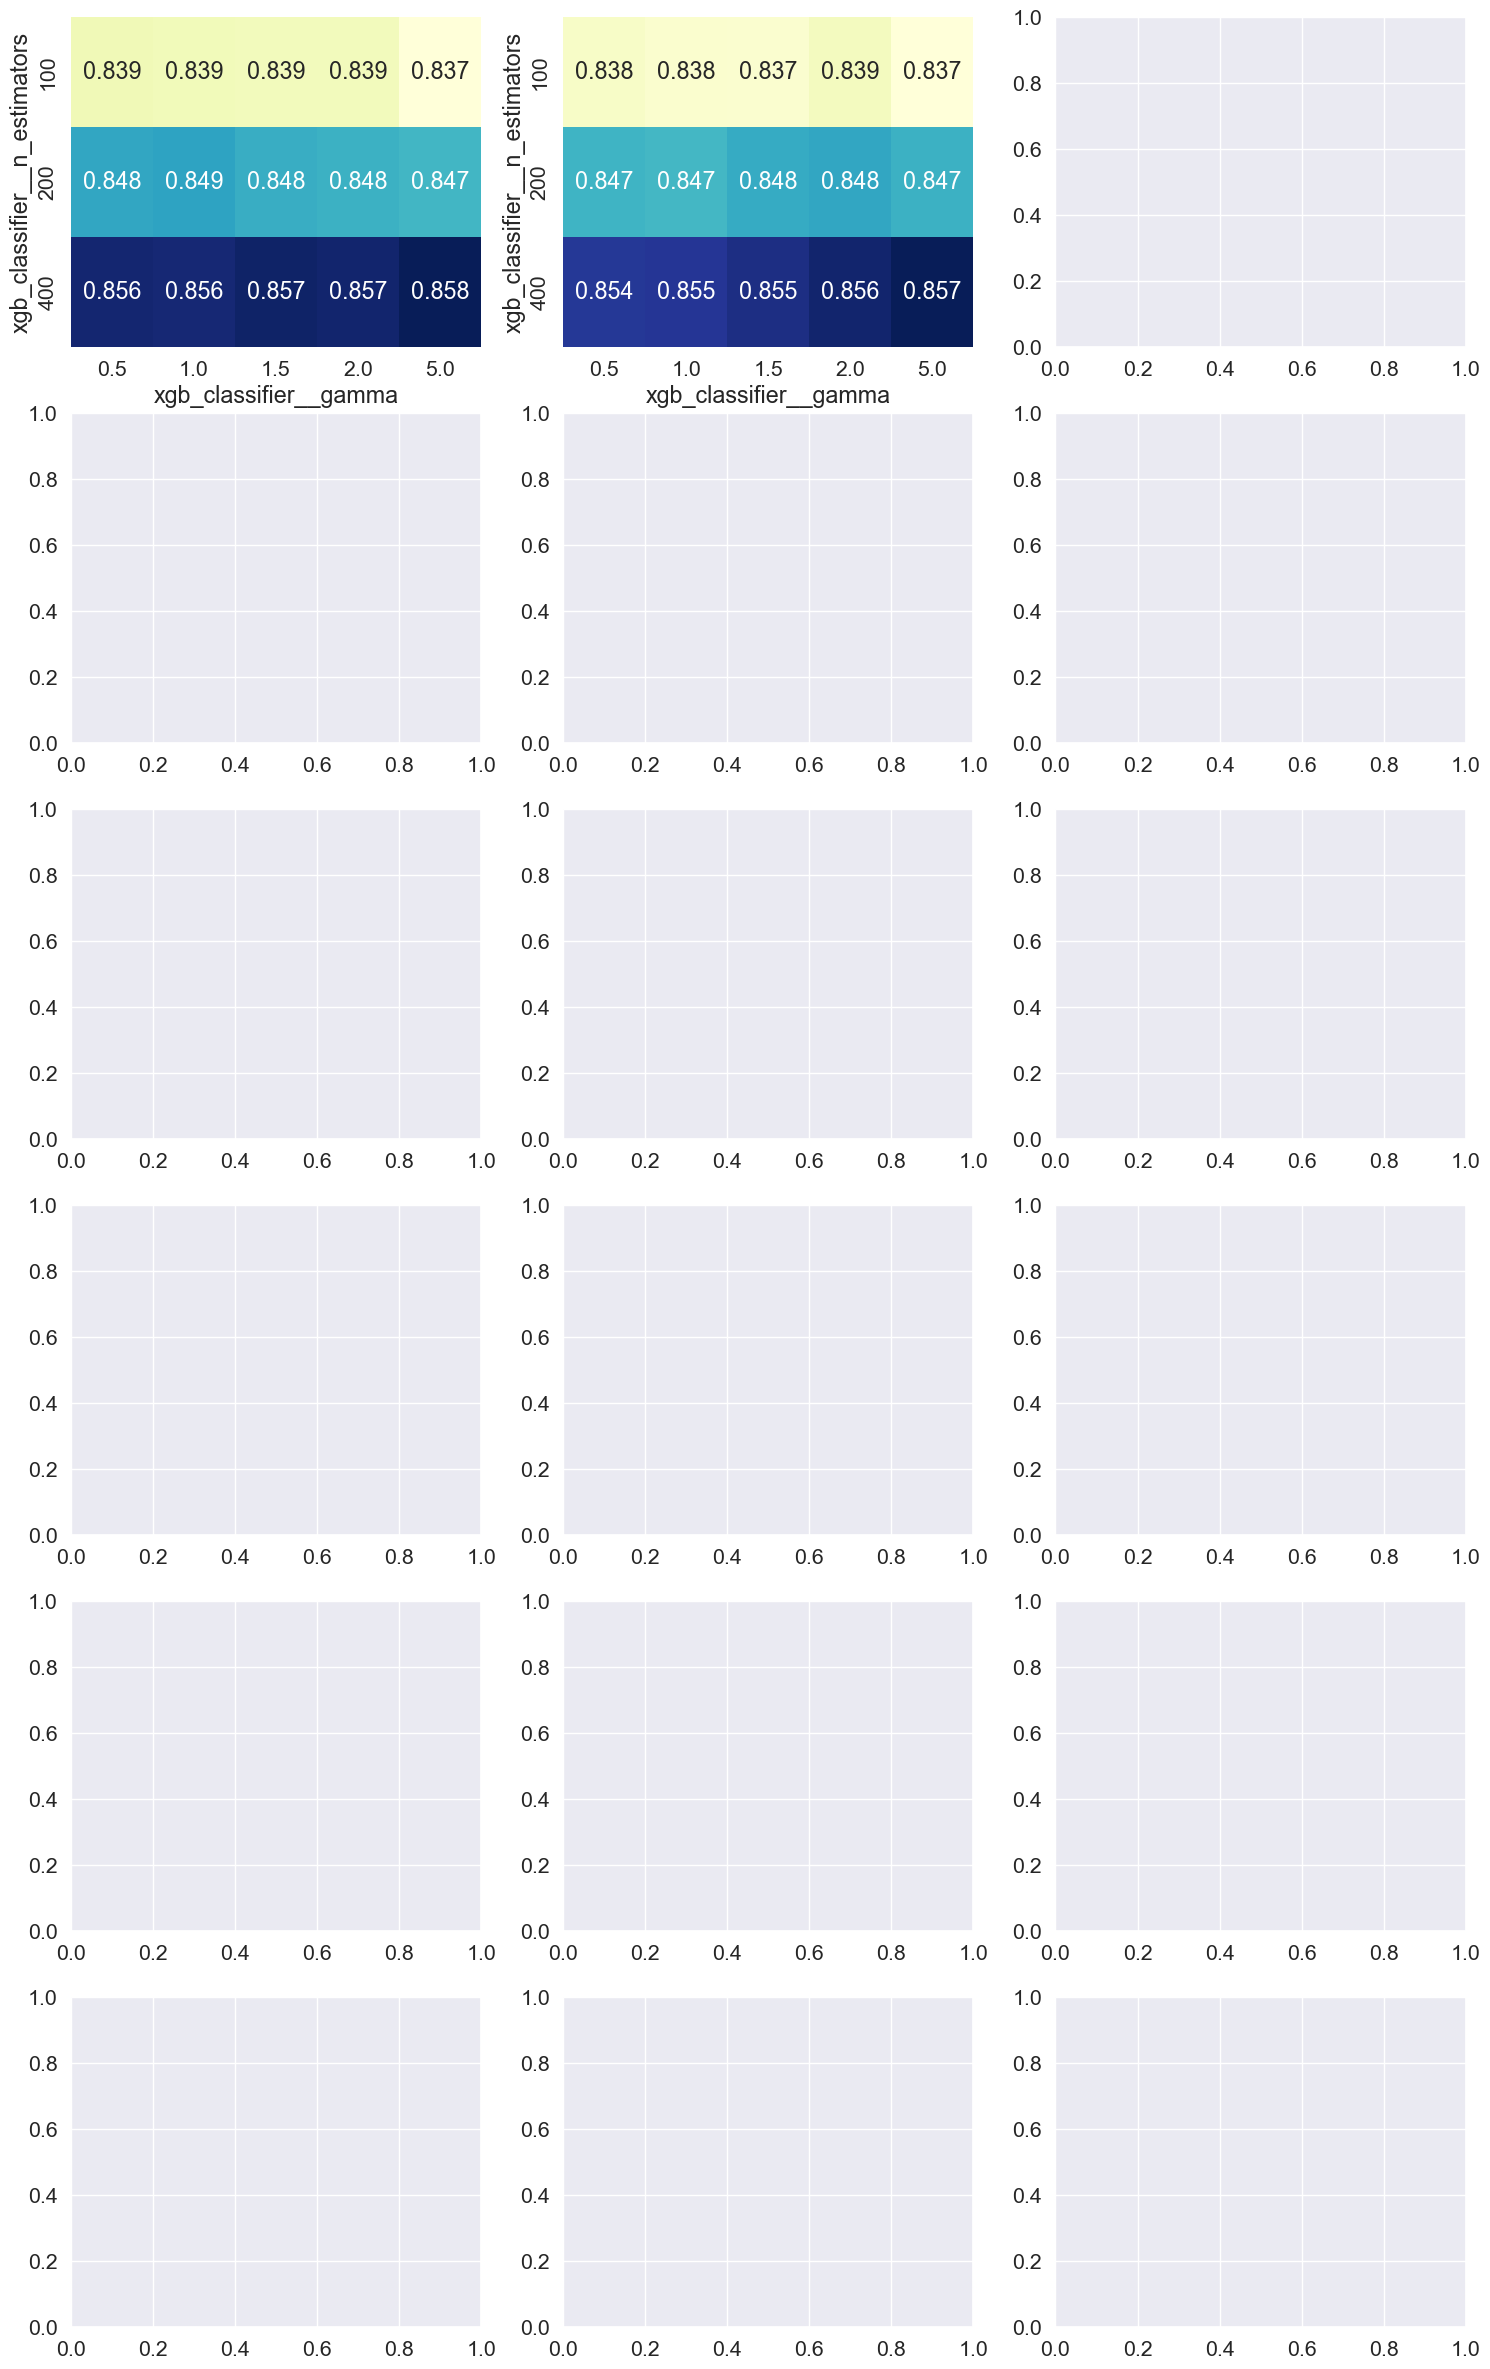

In [911]:
df_grid = pd.DataFrame(xgb_grid_search.cv_results_["params"])
df_grid['accuracy'] = np.round(xgb_grid_search.cv_results_["mean_test_score"],2)
plot_tuning_results(df_grid)

In [759]:
print(best_params_xgb)

{'xgb_classifier__colsample_bytree': 0.9, 'xgb_classifier__gamma': 1, 'xgb_classifier__learning_rate': 0.1, 'xgb_classifier__max_depth': 6, 'xgb_classifier__min_child_weight': 0.5, 'xgb_classifier__n_estimators': 200, 'xgb_classifier__subsample': 0.8}


In [849]:
#test parameters here, and see if can make it less overfitting

# Set the best hyperparameters
best_params = {
    'colsample_bytree': 0.9,
    'gamma': 1, #1
    'learning_rate': 0.1,
    'max_depth': 6, 
    'min_child_weight': 0.5,
    'n_estimators': 200,
    'subsample': 0.8,
    'alpha': 1 #alpha 1 -->0.57
}

test_params = {'colsample_bytree': 0.9, 'gamma': 0.5,
'learning_rate': 0.1, 'max_depth': 3,
'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6}

# Create the pipeline with the specified hyperparameters
XGB_pipeline_2 = imbpipeline(steps=[
    ["smote", SMOTE(random_state=42)],
    #["scaler", StandardScaler()],
    ["xgb_classifier", XGBClassifier(random_state=42, **best_params, scale_pos_weight = 2)]  #, scale_pos_weight = 2
])

modelfit = XGB_pipeline_2.fit(X_train, y_train)
Y_pred2 = XGB_pipeline_2.predict(X_test)
Y_train_pred = XGB_pipeline_2.predict(X_train)

In [850]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred2, digits=3, zero_division=1))

              precision    recall  f1-score   support

         0.0      0.922     0.955     0.938       286
         1.0      0.705     0.574     0.633        54

    accuracy                          0.894       340
   macro avg      0.813     0.764     0.785       340
weighted avg      0.888     0.894     0.890       340



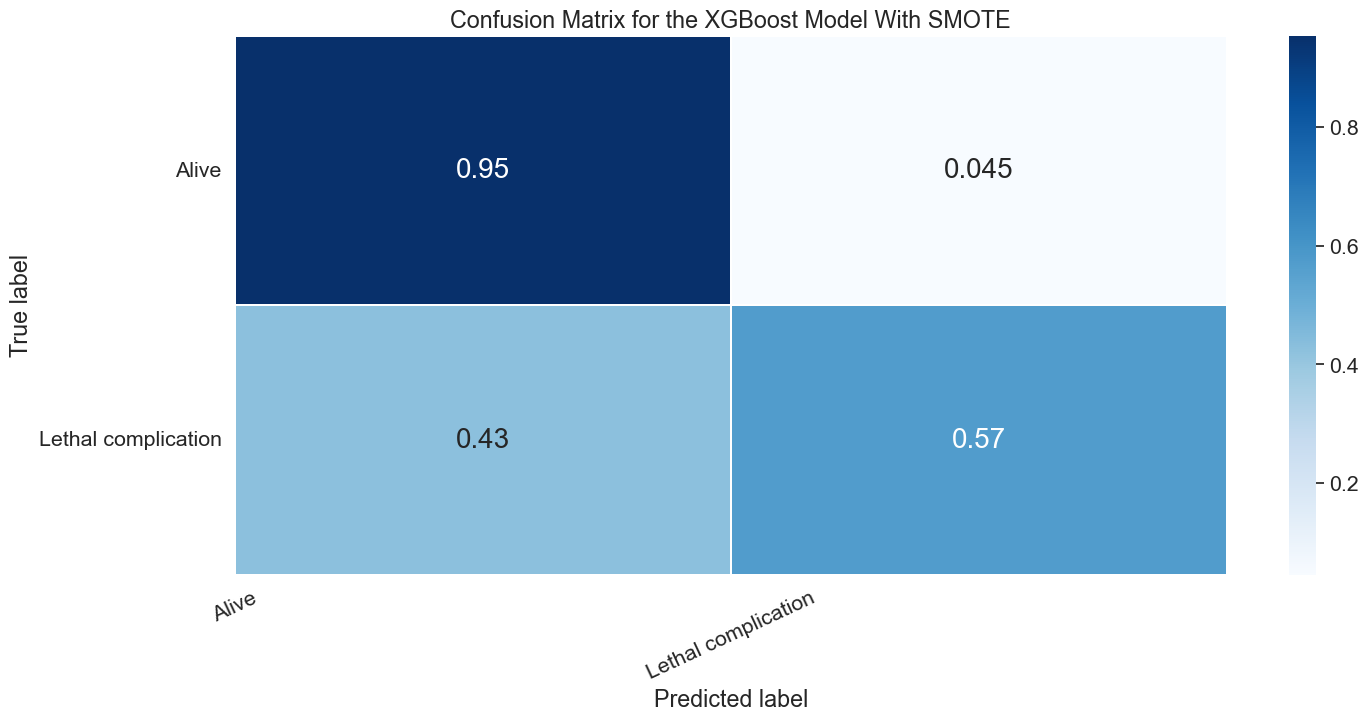

In [914]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, Y_pred2)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ["Alive", "Lethal complication"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for the XGBoost Model With SMOTE')
plt.show()

In [820]:
#Without standardscaler giving best results rn

In [851]:
print(accuracy_score(y_test, Y_pred2))
print(accuracy_score(y_train, Y_train_pred))

0.8941176470588236
1.0


In [912]:
cohen_kappa_score(y_test, Y_pred2)

0.5715485858302997

In [853]:
roc_auc_score(y_test, Y_pred2)

0.7643097643097643

In [855]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, XGB_pipeline_2.predict_proba(X_test)[:,1])

0.8640896140896142

In [854]:
from imblearn.metrics import specificity_score
specificity_score(y_test, Y_pred2 , average='macro')

0.7643097643097643

In [856]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test,Y_pred2)

0.5756399221715635

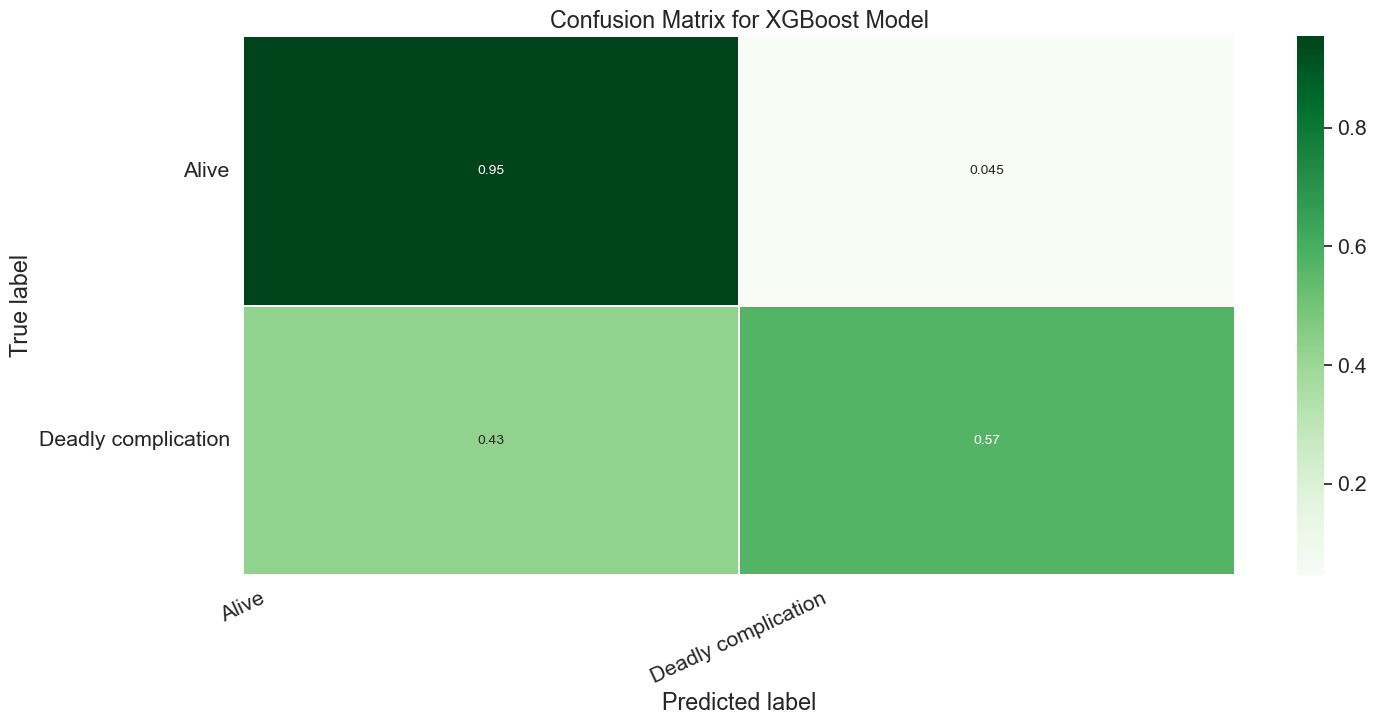

In [857]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, Y_pred2)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ["Alive", "Deadly complication"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

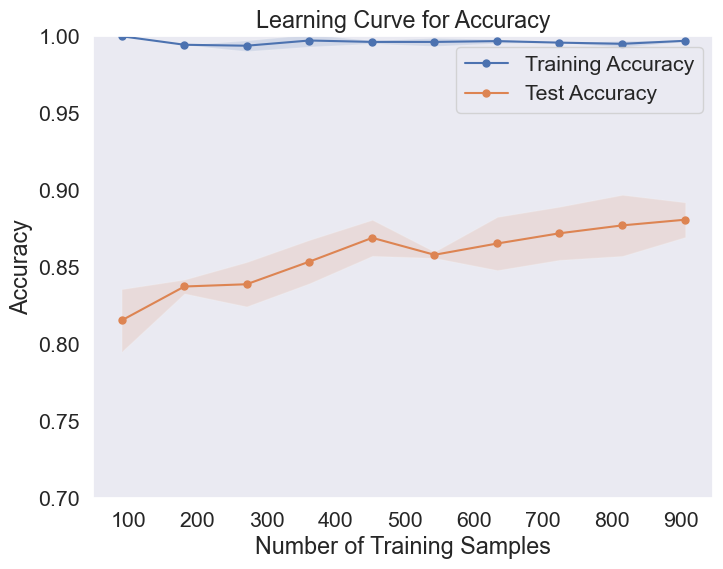

In [461]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have your best estimator from the grid search
best_estimator = modelfit #xgb_grid_search.best_estimator_

# Create a learning curve for accuracy
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold)

# Calculate mean and standard deviation of accuracy for training and test sets
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a plot of the learning curve for accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, marker='o', markersize=5, label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15)
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve for Accuracy')

# Adjust the limits of the y-axis to increase the range
plt.ylim(0.7, 1.0)  # You can adjust the range (0.7 to 1.0 in this example)
plt.grid()
plt.show()


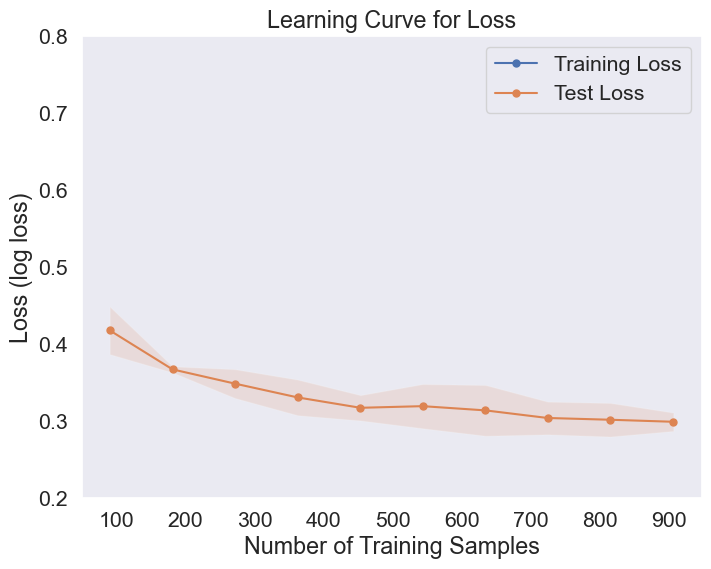

In [463]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss

# Assuming you have your best estimator from the grid search
best_estimator = xgb_grid_search.best_estimator_

# Create a custom scoring function for log loss
def custom_scoring(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return -log_loss(y, y_pred)

# Create a learning curve for log loss
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold, scoring=custom_scoring)

# Calculate mean and standard deviation of log loss for training and test sets
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a plot of the learning curve for loss
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', markersize=5, label='Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, marker='o', markersize=5, label='Test Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15)
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss (log loss)')
plt.legend()
plt.title('Learning Curve for Loss')

# Adjust the limits of the y-axis to increase the range
plt.ylim(0.2, 0.8)  # You can adjust the range (0 to 2 in this example)
plt.grid()
plt.show()

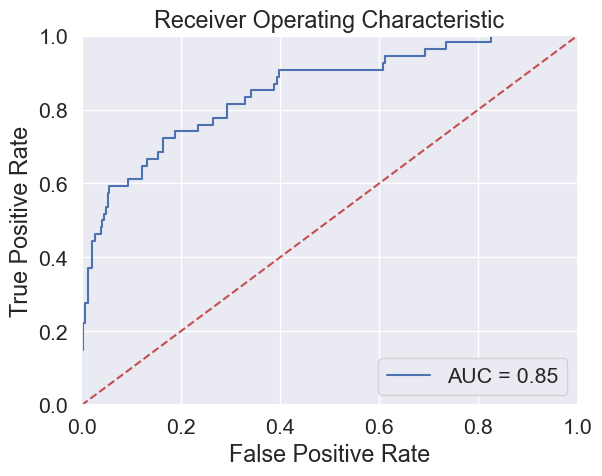

In [476]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = XGB_pipeline_2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
pip install shap


SHAP Values

In [477]:
import shap

#https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

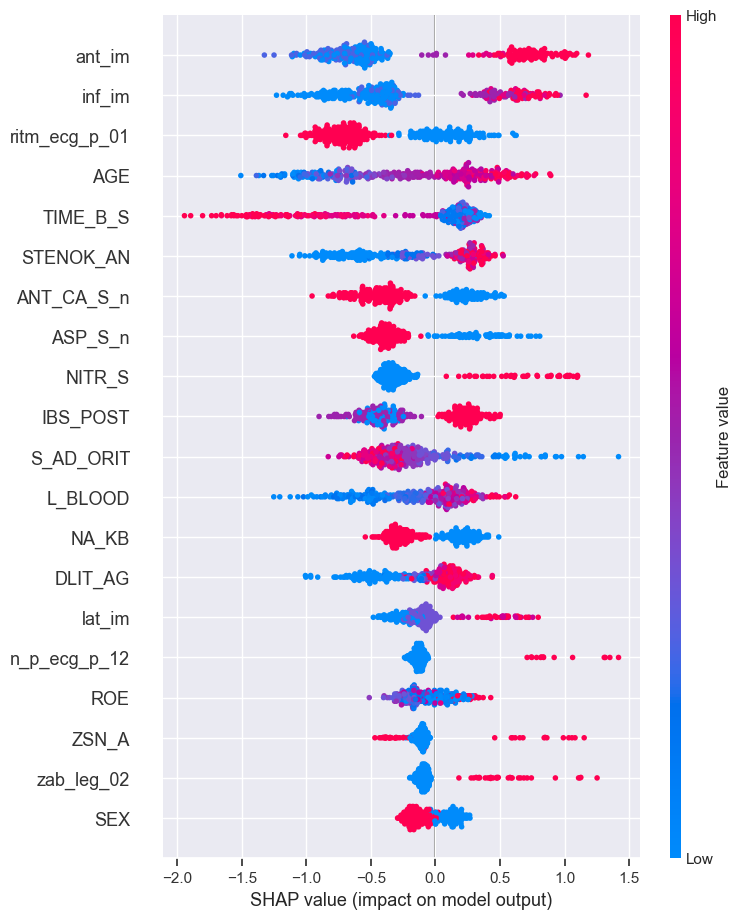

In [920]:
# Assuming 'XGB_pipeline_2' is your pipeline
from sklearn.base import is_classifier

# Extracting the model from the pipeline
model_xgb = XGB_pipeline_2
model = XGB_pipeline_2.named_steps['xgb_classifier']

explainer_ = shap.Explainer(model)
shap_values_ = explainer_.shap_values(X_test)

    # Visualizing Shapley values
shap.summary_plot(shap_values_, X_test)


In [859]:
# Convert SHAP values to a DataFrame
shap_values_df = pd.DataFrame(shap_values_, columns=X_test.columns)

# Save SHAP values to a CSV file
shap_values_df.to_csv('shap_values.csv', index=False)

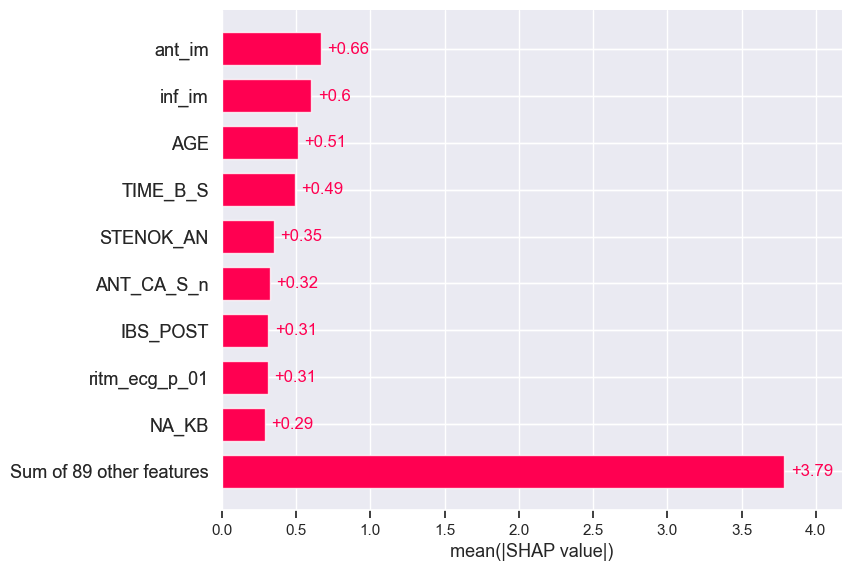

In [860]:
# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate Shapley values
shap_values = explainer(X_test)

# Create a bar plot of Shapley values
shap.plots.bar(shap_values)

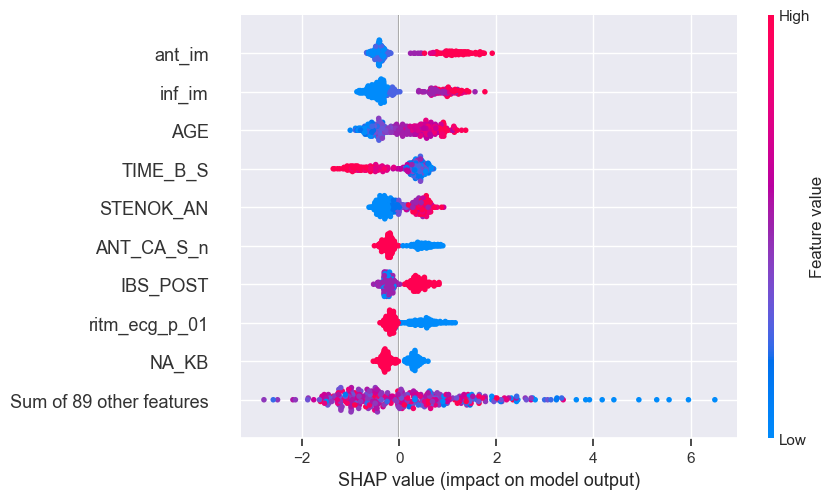

In [861]:
shap.plots.beeswarm(shap_values)

Iteration 1: Marginalized 1 feature(s). Kappa: 0.5160831198405921
Iteration 2: Marginalized 2 feature(s). Kappa: 0.4918872758326217
Iteration 3: Marginalized 3 feature(s). Kappa: 0.4697586113371305
Iteration 4: Marginalized 4 feature(s). Kappa: 0.3977522599560225
Iteration 5: Marginalized 5 feature(s). Kappa: 0.41435020194820615
Iteration 6: Marginalized 6 feature(s). Kappa: 0.4024752475247524
Iteration 7: Marginalized 7 feature(s). Kappa: 0.3807836188226028
Iteration 8: Marginalized 8 feature(s). Kappa: 0.3689320388349514
Iteration 9: Marginalized 9 feature(s). Kappa: 0.3885435168738899
Iteration 10: Marginalized 10 feature(s). Kappa: 0.3207924088563343
Iteration 11: Marginalized 11 feature(s). Kappa: 0.3207924088563343
Iteration 12: Marginalized 12 feature(s). Kappa: 0.3207924088563343
Iteration 13: Marginalized 13 feature(s). Kappa: 0.3207924088563343
Iteration 14: Marginalized 14 feature(s). Kappa: 0.3207924088563343
Iteration 15: Marginalized 15 feature(s). Kappa: 0.32351493272070

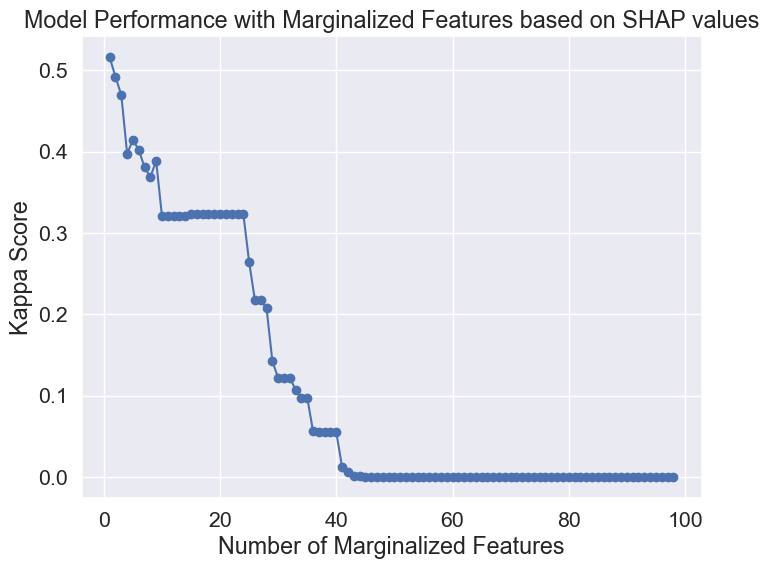

In [921]:
# Assuming you have SHAP values in a DataFrame named 'shap_values_df'
num_features = len(shap_values_df.columns)
kappa_scores_shap = []
feature_sets_shap = []

# Fit the model once before the loop
model_xgb.fit(X_train, y_train)

for i in range(num_features):
    # Marginalize features iteratively based on SHAP values
    top_features = shap_values_df.columns[:i+1]  # Top i+1 features based on SHAP values
    marginalized_X = X_test.copy()  # Create a copy of the test data
    
    for feature in top_features:
        marginalized_X[feature] = np.mean(marginalized_X[feature])  # Impute mean for each top feature
    
    # Model prediction without refitting
    marginalized_pred = model.predict(marginalized_X)
    kappa = cohen_kappa_score(y_test, marginalized_pred)
    
    kappa_scores_shap.append(kappa)
    feature_sets_shap.append(i+1)  # Number of marginalized features
    
    print(f"Iteration {i+1}: Marginalized {i+1} feature(s). Kappa: {kappa}")

# Plotting kappa scores vs. number of marginalized features
plt.figure(figsize=(8, 6))
plt.plot(feature_sets_shap, kappa_scores_shap, marker='o')
plt.xlabel('Number of Marginalized Features')
plt.ylabel('Kappa Score')
plt.title('Model Performance with Marginalized Features based on SHAP values')
plt.grid(True)
plt.show()



XGBoost built in Permutation Feature Importance

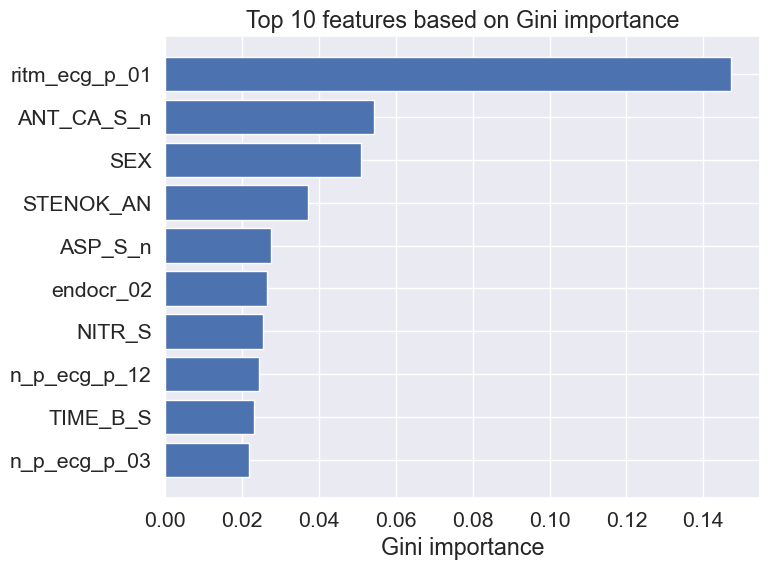

In [936]:
def plot_gini_importance(clf, X, ax, top_features=10):
    clf_importances = pd.Series(clf.feature_importances_, index=X.columns)
    clf_sorted_idx = np.argsort(clf.feature_importances_)

    # Sort by Gini importance
    gini_importance = clf_importances.sort_values(ascending=False)[:top_features]
    gini_sorted_idx = gini_importance.index

    ax.barh(np.arange(len(gini_sorted_idx)), gini_importance, align='center')
    ax.set_yticks(np.arange(len(gini_sorted_idx)))
    ax.set_yticklabels(gini_sorted_idx)
    ax.invert_yaxis()
    ax.set_xlabel('Gini importance')
    ax.set_title('Top 10 features based on Gini importance')

fig, ax = plt.subplots(figsize=(8, 6))
plot_gini_importance(model, X_train, ax, top_features=10)
plt.tight_layout()
plt.show()

#rename the features??



In [ ]:
#How to plot model performance with marginalized features? Is it the pixel flipping experiment?

#compare the 3 permutation importance methods in pixel flipping. #Kappa, #F1 use the same metric when comparing the three methods.

#Replace top feature with mean value and classify again, repeat multiple times. Start with originial performance (by using all features.). Marginalize in the same order provided by SHAP, and other methods etc. 

#plot all methods in one graph

#Best method is the one with the best ROC_AUC score

# do not refit model everytime.

#Marginalize all one-hot-encoded features belonging to the same categ. features at the same time.

#report importance on original features

#We don't want peaks, but it is a result, just elaborate. 


Create feature importance ranking gini (XGBoost built in function)

In [864]:
import numpy as np

# Assuming model.feature_importances_ is a numpy array
feature_importances = model.feature_importances_

# Sort indices based on feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Get sorted feature importances and corresponding feature names
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

# Print or use the sorted importances and feature names
for importance, feature_name in zip(sorted_importances, sorted_feature_names):
    print(f"{feature_name}: {importance}")


K_SH_POST: 0.12592384219169617
ant_im: 0.03057129867374897
n_p_ecg_p_10: 0.02976289577782154
ZSN_A: 0.029061658307909966
endocr_02: 0.026811908930540085
ritm_ecg_p_01: 0.02264389395713806
GIPER_NA: 0.022168228402733803
NITR_S: 0.022050045430660248
inf_im: 0.021556535735726357
n_p_ecg_p_12: 0.020613623782992363
ASP_S_n: 0.020152227953076363
AGE: 0.020044025033712387
ANT_CA_S_n: 0.019678372889757156
n_p_ecg_p_06: 0.018586551770567894
n_p_ecg_p_04: 0.01846311241388321
S_AD_ORIT: 0.018429333344101906
STENOK_AN: 0.017189742997288704
ritm_ecg_p_04: 0.01704169437289238
IM_PG_P: 0.016216283664107323
nr_04: 0.015459278598427773
IBS_POST: 0.015111691318452358
TIME_B_S: 0.014962202869355679
DLIT_AG: 0.01437767967581749
endocr_01: 0.013582936488091946
L_BLOOD: 0.013536921702325344
n_r_ecg_p_05: 0.01323695108294487
zab_leg_02: 0.01320518460124731
n_r_ecg_p_01: 0.013115471228957176
lat_im: 0.012765027582645416
O_L_POST: 0.012596863321959972
SIM_GIPERT: 0.012394164688885212
B_BLOK_S_n: 0.012350265868

In [865]:
print(len(feature_importances))

98


In [866]:
print(sorted_feature_names)

Index(['K_SH_POST', 'ant_im', 'n_p_ecg_p_10', 'ZSN_A', 'endocr_02',
       'ritm_ecg_p_01', 'GIPER_NA', 'NITR_S', 'inf_im', 'n_p_ecg_p_12',
       'ASP_S_n', 'AGE', 'ANT_CA_S_n', 'n_p_ecg_p_06', 'n_p_ecg_p_04',
       'S_AD_ORIT', 'STENOK_AN', 'ritm_ecg_p_04', 'IM_PG_P', 'nr_04',
       'IBS_POST', 'TIME_B_S', 'DLIT_AG', 'endocr_01', 'L_BLOOD',
       'n_r_ecg_p_05', 'zab_leg_02', 'n_r_ecg_p_01', 'lat_im', 'O_L_POST',
       'SIM_GIPERT', 'B_BLOK_S_n', 'n_r_ecg_p_04', 'SVT_POST', 'D_AD_ORIT',
       'zab_leg_01', 'FK_STENOK', 'SEX', 'LID_S_n', 'NA_BLOOD', 'GEPAR_S_n',
       'n_p_ecg_p_07', 'LID_KB', 'GIPO_K', 'ritm_ecg_p_07', 'zab_leg_03', 'GB',
       'NOT_NA_KB', 'n_r_ecg_p_03', 'nr_03', 'ROE', 'INF_ANAM', 'MP_TP_POST',
       'NA_KB', 'post_im', 'ritm_ecg_p_08', 'K_BLOOD', 'AST_BLOOD',
       'ritm_ecg_p_02', 'ALT_BLOOD', 'n_r_ecg_p_06', 'TRENT_S_n',
       'fibr_ter_03', 'n_p_ecg_p_03', 'GT_POST', 'n_p_ecg_p_09',
       'n_p_ecg_p_05', 'n_p_ecg_p_08', 'nr_02', 'nr_01', 'nr_11',
  

In [867]:
print(sorted_indices)

[35 40 68  9 25 45 80 90 42 70 95  0 93 64 62 32  3 47 44 14  5 86  8 24
 84 55 28 51 41 34  7 92 54 37 33 27  4  1 91 81 94 65 89 78 49 29  6 88
 53 13 85  2 36 87 43 50 79 83 46 82 56 97 73 61 38 67 63 66 12 11 10 69
 16 71 72 74 75 76 77 15 17 39 59 96 52 31 30 57 58 26 18 60 23 22 21 20
 19 48]


Marginalizing top feature during each iteration, including the initial model performance without removing features

Iteration 0: Marginalized 0 feature(s). Kappa: 0.5715485858302997
Iteration 1: Marginalized 1 feature(s). Kappa: 0.43610335195530725
Iteration 2: Marginalized 2 feature(s). Kappa: 0.42344961240310086
Iteration 3: Marginalized 3 feature(s). Kappa: 0.42344961240310086
Iteration 4: Marginalized 4 feature(s). Kappa: 0.4196428571428571
Iteration 5: Marginalized 5 feature(s). Kappa: 0.35981924308039914
Iteration 6: Marginalized 6 feature(s). Kappa: 0.11661792354292866
Iteration 7: Marginalized 7 feature(s). Kappa: 0.11661792354292866
Iteration 8: Marginalized 8 feature(s). Kappa: 0.0044854223772737845
Iteration 9: Marginalized 9 feature(s). Kappa: 0.001113310242454424
Iteration 10: Marginalized 10 feature(s). Kappa: 0.0
Iteration 11: Marginalized 11 feature(s). Kappa: 0.0
Iteration 12: Marginalized 12 feature(s). Kappa: 0.0
Iteration 13: Marginalized 13 feature(s). Kappa: 0.0
Iteration 14: Marginalized 14 feature(s). Kappa: 0.0
Iteration 15: Marginalized 15 feature(s). Kappa: 0.0
Iteration 1

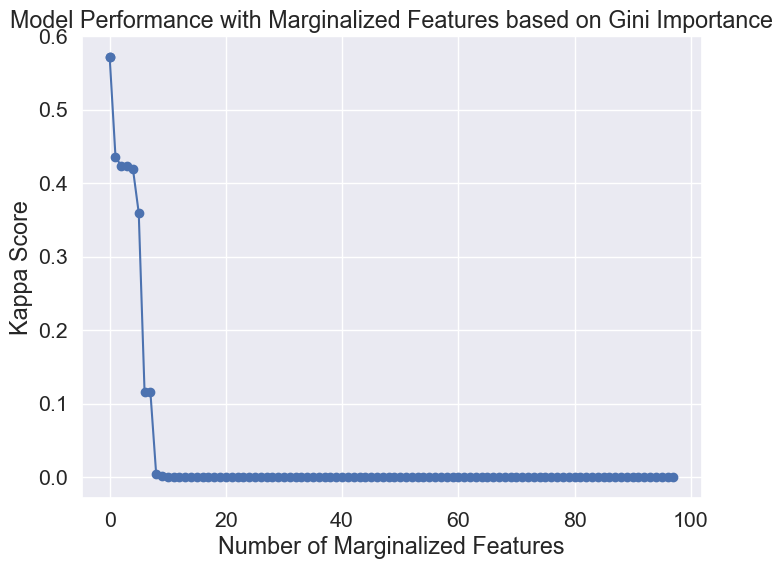

In [918]:
from sklearn.metrics import cohen_kappa_score

num_features = len(X_train.columns)
kappa_scores = []
feature_sets = []

model_xgb = XGB_pipeline_2

# Fit the model once without any marginalized features
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_test)
kappa = cohen_kappa_score(y_test, pred)
kappa_scores.append(kappa)
feature_sets.append(0)  # Zero marginalized features

# Assuming 'sorted_feature_names' contains the features sorted by Gini importance
for i in range(0, num_features):  # Starting from 1 to exclude the initial fit
    # Marginalize features iteratively based on Gini importance ranking
    marginalized_X = X_test.copy()
    top_features = sorted_feature_names[:i]  # Top i features
    
    for feature in top_features:
        marginalized_X[feature] = np.mean(marginalized_X[feature])  # Impute mean for each top feature
    
    # Model prediction on marginalized feature sets
    marginalized_pred = model.predict(marginalized_X)
    kappa = cohen_kappa_score(y_test, marginalized_pred)
    
    kappa_scores.append(kappa)
    feature_sets.append(i)  # Number of marginalized features
    
    print(f"Iteration {i}: Marginalized {i} feature(s). Kappa: {kappa}")

# Plotting kappa scores vs. number of marginalized features
plt.figure(figsize=(8, 6))
plt.plot(feature_sets, kappa_scores, marker='o')
plt.xlabel('Number of Marginalized Features')
plt.ylabel('Kappa Score')
plt.title('Model Performance with Marginalized Features based on Gini Importance')
plt.grid(True)
plt.show()



Iteration 1: Marginalized 1 feature(s). F1 Score: 0.5800000000000001
Iteration 2: Marginalized 2 feature(s). F1 Score: 0.3902439024390244
Iteration 3: Marginalized 3 feature(s). F1 Score: 0.3703703703703704
Iteration 4: Marginalized 4 feature(s). F1 Score: 0.35443037974683544
Iteration 5: Marginalized 5 feature(s). F1 Score: 0.358974358974359
Iteration 6: Marginalized 6 feature(s). F1 Score: 0.36363636363636365
Iteration 7: Marginalized 7 feature(s). F1 Score: 0.36363636363636365
Iteration 8: Marginalized 8 feature(s). F1 Score: 0.37837837837837834
Iteration 9: Marginalized 9 feature(s). F1 Score: 0.30769230769230765
Iteration 10: Marginalized 10 feature(s). F1 Score: 0.19672131147540986
Iteration 11: Marginalized 11 feature(s). F1 Score: 0.07017543859649122
Iteration 12: Marginalized 12 feature(s). F1 Score: 0.03571428571428571
Iteration 13: Marginalized 13 feature(s). F1 Score: 0.0
Iteration 14: Marginalized 14 feature(s). F1 Score: 0.0
Iteration 15: Marginalized 15 feature(s). F1 Sc

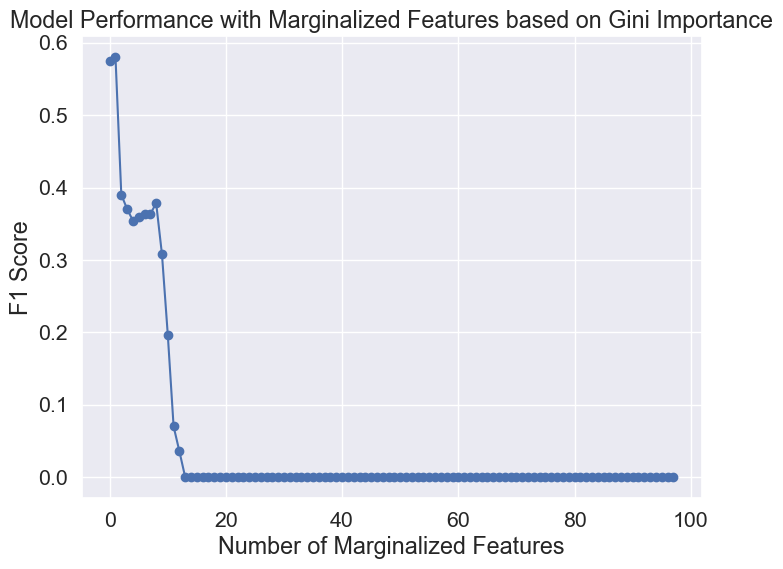

In [869]:
from sklearn.metrics import f1_score

num_features = len(X_train.columns)
f1_scores = []
feature_sets = []

# Fit the model once without any marginalized features
model.fit(X_train, y_train)
pred = model.predict(X_test)
f1 = f1_score(y_test, pred)
f1_scores.append(f1)
feature_sets.append(0)  # Zero marginalized features

# Assuming 'sorted_feature_names' contains the features sorted by Gini importance
for i in range(1, num_features):  # Starting from 1 to exclude the initial fit
    # Marginalize features iteratively based on Gini importance ranking
    marginalized_X = X_test.copy()
    top_features = sorted_feature_names[:i]  # Top i features
    
    for feature in top_features:
        marginalized_X[feature] = np.mean(marginalized_X[feature])  # Impute mean for each top feature
    
    # Model prediction on marginalized feature sets
    marginalized_pred = model.predict(marginalized_X)
    f1 = f1_score(y_test, marginalized_pred)
    
    f1_scores.append(f1)
    feature_sets.append(i)  # Number of marginalized features
    
    print(f"Iteration {i}: Marginalized {i} feature(s). F1 Score: {f1}")

# Plotting F1 scores vs. number of marginalized features
plt.figure(figsize=(8, 6))
plt.plot(feature_sets, f1_scores, marker='o')
plt.xlabel('Number of Marginalized Features')
plt.ylabel('F1 Score')
plt.title('Model Performance with Marginalized Features based on Gini Importance')
plt.grid(True)
plt.show()


Iteration 0: Marginalized 0 feature(s). F1 Score: 0.5742574257425743
Iteration 1: Marginalized 1 feature(s). F1 Score: 0.5800000000000001
Iteration 2: Marginalized 2 feature(s). F1 Score: 0.3902439024390244
Iteration 3: Marginalized 3 feature(s). F1 Score: 0.3703703703703704
Iteration 4: Marginalized 4 feature(s). F1 Score: 0.35443037974683544
Iteration 5: Marginalized 5 feature(s). F1 Score: 0.358974358974359
Iteration 6: Marginalized 6 feature(s). F1 Score: 0.36363636363636365
Iteration 7: Marginalized 7 feature(s). F1 Score: 0.36363636363636365
Iteration 8: Marginalized 8 feature(s). F1 Score: 0.37837837837837834
Iteration 9: Marginalized 9 feature(s). F1 Score: 0.30769230769230765
Iteration 10: Marginalized 10 feature(s). F1 Score: 0.19672131147540986
Iteration 11: Marginalized 11 feature(s). F1 Score: 0.07017543859649122
Iteration 12: Marginalized 12 feature(s). F1 Score: 0.03571428571428571
Iteration 13: Marginalized 13 feature(s). F1 Score: 0.0
Iteration 14: Marginalized 14 feat

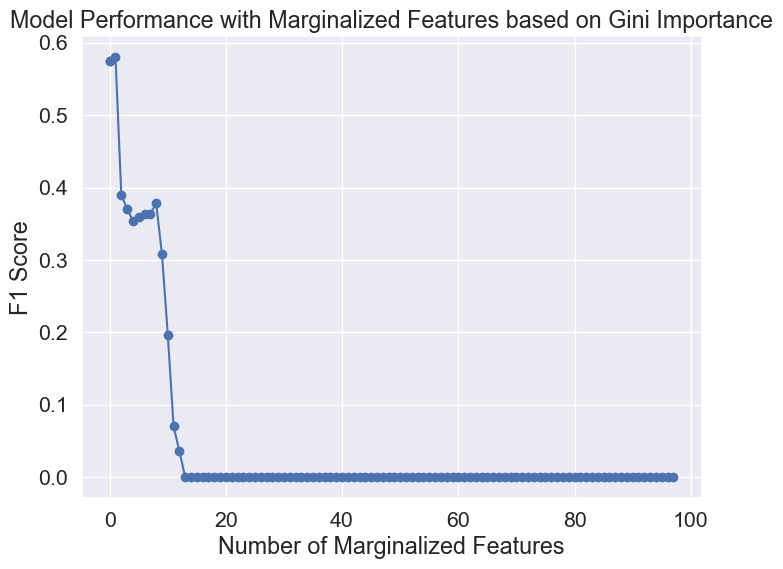

In [922]:
from sklearn.metrics import f1_score

num_features = len(X_train.columns)
f1_scores = []
feature_sets = []

# Fit the model once without any marginalized features
model.fit(X_train, y_train)
pred = model_xgb.predict(X_test)
f1 = f1_score(y_test, pred)
f1_scores.append(f1)
feature_sets.append(0)  # Zero marginalized features

# Assuming 'sorted_feature_names' contains the features sorted by Gini importance
for i in range(0, num_features):  # Starting from 1 to exclude the initial fit
    # Marginalize features iteratively based on Gini importance ranking
    marginalized_X = X_test.copy()
    top_features = sorted_feature_names[:i]  # Top i features
    
    for feature in top_features:
        marginalized_X[feature] = np.mean(marginalized_X[feature])  # Impute mean for each top feature
    
    # Model prediction on marginalized feature sets
    marginalized_pred = model.predict(marginalized_X)
    f1 = f1_score(y_test, marginalized_pred)
    
    f1_scores.append(f1)
    feature_sets.append(i)  # Number of marginalized features
    
    print(f"Iteration {i}: Marginalized {i} feature(s). F1 Score: {f1}")

# Plotting F1 scores vs. number of marginalized features
plt.figure(figsize=(8, 6))
plt.plot(feature_sets, f1_scores, marker='o')
plt.xlabel('Number of Marginalized Features')
plt.ylabel('F1 Score')
plt.title('Model Performance with Marginalized Features based on Gini Importance')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import f1_score

num_features = len(X_train.columns)
f1_scores = []
feature_sets = []

# Fit the model once without any marginalized features
model.fit(X_train, y_train)
pred = model.predict(X_test)
f1 = f1_score(y_test, pred)
f1_scores.append(f1)
feature_sets.append(0)  # Zero marginalized features

# Assuming 'sorted_feature_names' contains the features sorted by Gini importance
for i in range(1, num_features):  # Starting from 1 to exclude the initial fit
    # Marginalize features iteratively based on Gini importance ranking
    marginalized_X = X_test.copy()
    top_features = sorted_feature_names[:i]  # Top i features
    
    for feature in top_features:
        marginalized_X[feature] = np.mean(marginalized_X[feature])  # Impute mean for each top feature
    
    # Model prediction on marginalized feature sets
    marginalized_pred = model.predict(marginalized_X)
    f1 = f1_score(y_test, marginalized_pred)
    
    f1_scores.append(f1)
    feature_sets.append(i)  # Number of marginalized features
    
    print(f"Iteration {i}: Marginalized {i} feature(s). F1 Score: {f1}")

# Plotting F1 scores vs. number of marginalized features
plt.figure(figsize=(8, 6))
plt.plot(feature_sets, f1_scores, marker='o')
plt.xlabel('Number of Marginalized Features')
plt.ylabel('F1 Score')
plt.title('Model Performance with Marginalized Features based on Gini Importance')
plt.grid(True)
plt.show()

Random Permutation (SKlearn)

In [870]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

sorted_idx = perm_importance.importances_mean.argsort()
print(sorted_idx)

sorted_feature_names_sk = X_test.columns[sorted_idx]
print(sorted_feature_names_sk)

{'importances_mean': array([ 0.01411765,  0.        ,  0.00058824,  0.00823529,  0.        ,
        0.00764706,  0.00529412,  0.        , -0.00470588,  0.00235294,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00058824,
       -0.00470588,  0.        ,  0.00411765,  0.00411765,  0.        ,
        0.        ,  0.        ,  0.00352941, -0.00176471,  0.00117647,
       -0.00117647,  0.        ,  0.        ,  0.        ,  0.        ,
        0.02882353, -0.00294118, -0.01411765,  0.00352941, -0.00352941,
       -0.00294118,  0.        ,  0.        ,  0.        ,  0.00058824,
        0.        , -0.00235294,  0.        ,  0.00058824,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.       

In [871]:
sorted_idx = perm_importance.importances_mean.argsort()

print(sorted_idx)

[42 84 93 87  8 25 85 44 83 45 41 51 91 88 33 35 79 78 14 63 62 61 60 58
 57 56 55 54 52 59 64 66 13 67 68 69 70 71 72 73 74 75 76 77 80  1 65 50
  4 48 23 20 12 26 19 96 29 30 31 18 17 22 36 38 39 11 10 16  7 15 46 47
 37 21 81  2 49 53 92 24 34 94  9 90 32 43 89 27 28 97  6 95  5  3 82  0
 86 40]


In [872]:
# Assuming X_test is your DataFrame
sorted_feature_names_sk = X_test.columns[sorted_idx]
print(sorted_feature_names_sk)

Index(['inf_im', 'L_BLOOD', 'ANT_CA_S_n', 'NA_KB', 'DLIT_AG', 'endocr_02',
       'ROE', 'IM_PG_P', 'AST_BLOOD', 'ritm_ecg_p_01', 'lat_im',
       'n_r_ecg_p_01', 'LID_S_n', 'NOT_NA_KB', 'D_AD_ORIT', 'K_SH_POST',
       'K_BLOOD', 'GIPO_K', 'nr_04', 'n_p_ecg_p_05', 'n_p_ecg_p_04',
       'n_p_ecg_p_03', 'n_p_ecg_p_01', 'n_r_ecg_p_09', 'n_r_ecg_p_08',
       'n_r_ecg_p_06', 'n_r_ecg_p_05', 'n_r_ecg_p_04', 'n_r_ecg_p_02',
       'n_r_ecg_p_10', 'n_p_ecg_p_06', 'n_p_ecg_p_08', 'nr_03', 'n_p_ecg_p_09',
       'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
       'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06',
       'fibr_ter_07', 'fibr_ter_08', 'GIPER_NA', 'SEX', 'n_p_ecg_p_07',
       'ritm_ecg_p_08', 'FK_STENOK', 'ritm_ecg_p_06', 'np_10', 'np_07',
       'nr_02', 'endocr_03', 'np_05', 'TIKL_S_n', 'zab_leg_03', 'zab_leg_04',
       'zab_leg_06', 'np_04', 'np_01', 'np_09', 'MP_TP_POST', 'GT_POST',
       'FIB_G_POST', 'nr_01', 'nr_11', 'nr_08', 'SIM_GIPERT', 'n

Iteration 1: Marginalized 1 feature(s). Kappa: 0.47945904567491715
Iteration 2: Marginalized 2 feature(s). Kappa: 0.46465295629820047
Iteration 3: Marginalized 3 feature(s). Kappa: 0.3690432551319648
Iteration 4: Marginalized 4 feature(s). Kappa: 0.2195608782435129
Iteration 5: Marginalized 5 feature(s). Kappa: 0.20154185022026438
Iteration 6: Marginalized 6 feature(s). Kappa: 0.14866830796777075
Iteration 7: Marginalized 7 feature(s). Kappa: 0.1516769177207845
Iteration 8: Marginalized 8 feature(s). Kappa: 0.09886149989555038
Iteration 9: Marginalized 9 feature(s). Kappa: 0.08878744357816992
Iteration 10: Marginalized 10 feature(s). Kappa: 0.005620316402997649
Iteration 11: Marginalized 11 feature(s). Kappa: 0.002231958336777695
Iteration 12: Marginalized 12 feature(s). Kappa: 0.002231958336777695
Iteration 13: Marginalized 13 feature(s). Kappa: 0.002231958336777695
Iteration 14: Marginalized 14 feature(s). Kappa: 0.0
Iteration 15: Marginalized 15 feature(s). Kappa: 0.0
Iteration 16: 

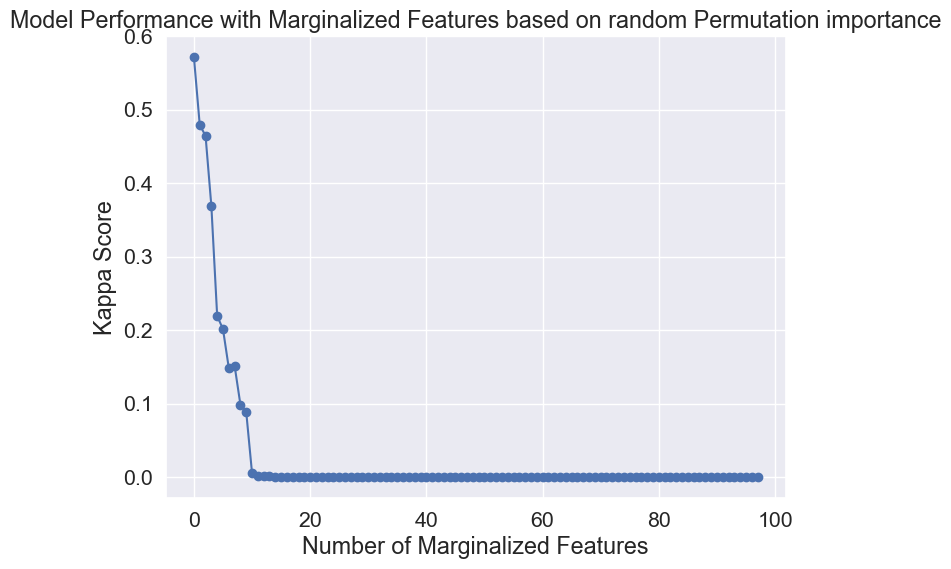

In [923]:
from sklearn.metrics import cohen_kappa_score

num_features = len(X_test.columns)
kappa_scores_sk = []
feature_sets_sk = []

# Fit the model once without any marginalized features
model_xgb.fit(X_train, y_train)
pred_sk = model.predict(X_test)
kappa_sk = cohen_kappa_score(y_test, pred_sk)
kappa_scores_sk.append(kappa_sk)
feature_sets_sk.append(0)  # Zero marginalized features

# Assuming 'sorted_feature_names' contains the features sorted by Gini importance
for i in range(1, num_features):  # Starting from 1 to exclude the initial fit
    # Marginalize features iteratively based on Gini importance ranking
    marginalized_X_sk = X_test.copy()
    top_features_sk = sorted_feature_names_sk[:i]  # Top i features
    
    for feature in top_features_sk:
        marginalized_X_sk[feature] = np.mean(marginalized_X_sk[feature])  # Impute mean for each top feature
    
    # Model prediction on marginalized feature sets
    marginalized_pred_sk = model.predict(marginalized_X_sk)
    kappa_sk = cohen_kappa_score(y_test, marginalized_pred_sk)
    
    kappa_scores_sk.append(kappa_sk)
    feature_sets_sk.append(i)  # Number of marginalized features
    
    print(f"Iteration {i}: Marginalized {i} feature(s). Kappa: {kappa_sk}")

# Plotting kappa scores vs. number of marginalized features
plt.figure(figsize=(8, 6))
plt.plot(feature_sets_sk, kappa_scores_sk, marker='o')
plt.xlabel('Number of Marginalized Features')
plt.ylabel('Kappa Score')
plt.title('Model Performance with Marginalized Features based on random Permutation importance')
plt.grid(True)
plt.show()


compare plots 

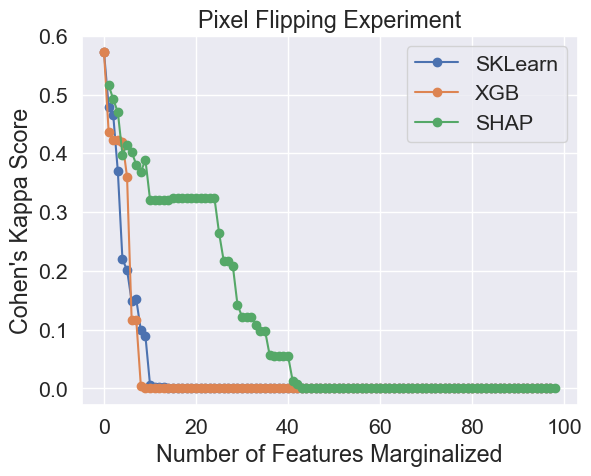

In [927]:
#plt.plot(range(1, len(kappa_scores_SHAP) + 1), kappa_scores_SHAP, label='SHAP', marker='.')
#plt.plot(range(1, len(kappa_scores_LTCN) + 1), kappa_scores_LTCN, label='LTCN', marker='.')

plt.plot(feature_sets_sk, kappa_scores_sk, marker='o', label='SKlearn')
plt.plot(feature_sets, kappa_scores, marker='o', label='XGB')
plt.plot(feature_sets_shap, kappa_scores_shap, marker='o', label='SHAP')

plt.xlabel('Number of Features Marginalized')
plt.ylabel('Cohen\'s Kappa Score')
plt.title('Pixel Flipping Experiment')
plt.legend(['SKLearn', 'XGB', 'SHAP']) 
plt.show()